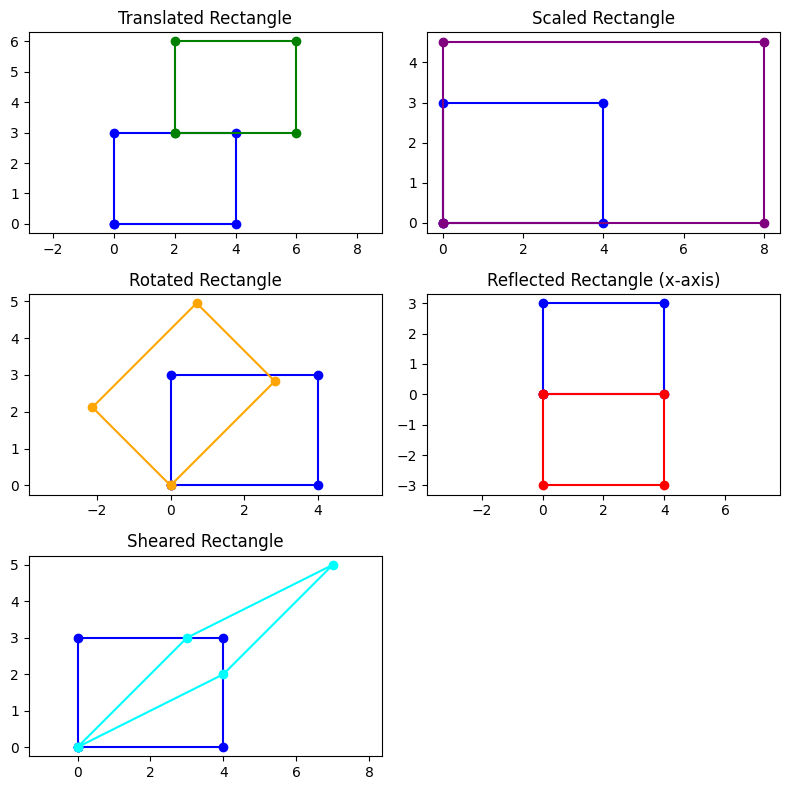

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_polygon(polygon, title, color='blue'):
    polygon = np.append(polygon, polygon[:1], axis=0)  # Connect last point to the first
    plt.plot(polygon[:, 0], polygon[:, 1], marker='o', color=color)
    plt.title(title)
    plt.axis('equal')

# Define a 2D rectangle
rectangle = np.array([[0, 0], [4, 0], [4, 3], [0, 3]])

# 1. Translation
def translate(polygon, tx, ty):
    transformation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    transformed_polygon = homogeneous_polygon @ transformation_matrix.T
    return transformed_polygon[:, :2]

translated_rect = translate(rectangle, 2, 3)
plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_polygon(rectangle, "Original Rectangle")
plot_polygon(translated_rect, "Translated Rectangle", color='green')

# 2. Scaling
def scale(polygon, sx, sy):
    transformation_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    transformed_polygon = homogeneous_polygon @ transformation_matrix.T
    return transformed_polygon[:, :2]

scaled_rect = scale(rectangle, 2, 1.5)
plt.subplot(322)
plot_polygon(rectangle, "Original Rectangle")
plot_polygon(scaled_rect, "Scaled Rectangle", color='purple')

# 3. Rotation
def rotate(polygon, angle):
    rad = np.radians(angle)
    transformation_matrix = np.array([[np.cos(rad), -np.sin(rad), 0],
                                       [np.sin(rad), np.cos(rad), 0],
                                       [0, 0, 1]])
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    transformed_polygon = homogeneous_polygon @ transformation_matrix.T
    return transformed_polygon[:, :2]

rotated_rect = rotate(rectangle, 45)
plt.subplot(323)
plot_polygon(rectangle, "Original Rectangle")
plot_polygon(rotated_rect, "Rotated Rectangle", color='orange')

# 4. Reflection (x-axis)
def reflect(polygon, axis='x'):
    if axis == 'x':
        transformation_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        transformation_matrix = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    else:
        raise ValueError("Axis must be 'x' or 'y'")
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    transformed_polygon = homogeneous_polygon @ transformation_matrix.T
    return transformed_polygon[:, :2]

reflected_rect = reflect(rectangle, axis='x')
plt.subplot(324)
plot_polygon(rectangle, "Original Rectangle")
plot_polygon(reflected_rect, "Reflected Rectangle (x-axis)", color='red')

# 5. Shearing
def shear(polygon, shx=0, shy=0):
    transformation_matrix = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    transformed_polygon = homogeneous_polygon @ transformation_matrix.T
    return transformed_polygon[:, :2]

sheared_rect = shear(rectangle, shx=1, shy=0.5)
plt.subplot(325)
plot_polygon(rectangle, "Original Rectangle")
plot_polygon(sheared_rect, "Sheared Rectangle", color='cyan')

plt.tight_layout()
plt.show()


Original Image


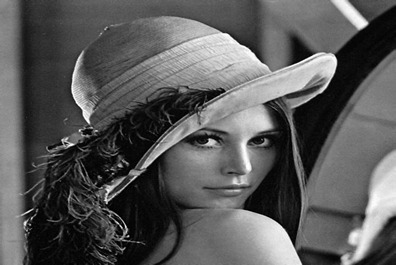

Translated Image (100 px right, 50 px down)


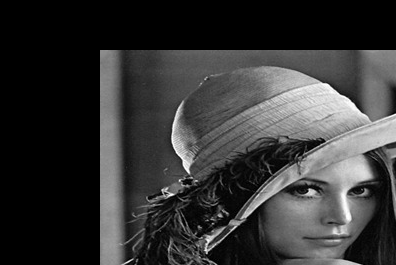

Reflected Image (Across X-axis)


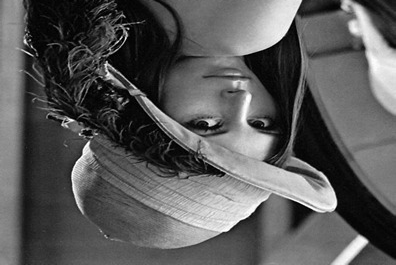

Rotated Image (45°)


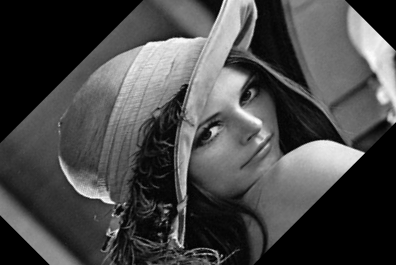

Scaled Image (1.5x in both directions)


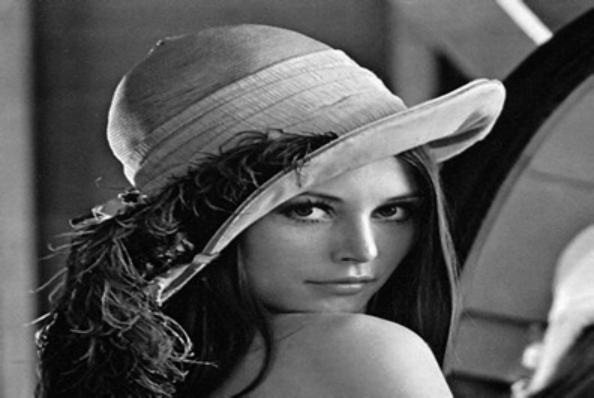

Cropped Image (From 50 to 200 px in both directions)


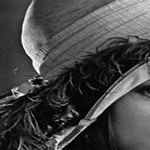

Sheared Image (Shear in X-axis, 0.2)


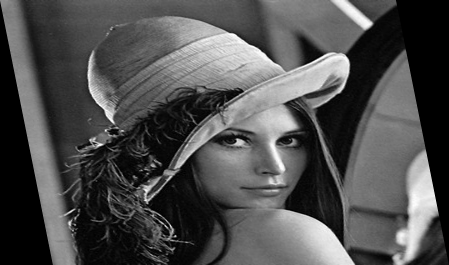

Sheared Image (Shear in Y-axis, 0.2)


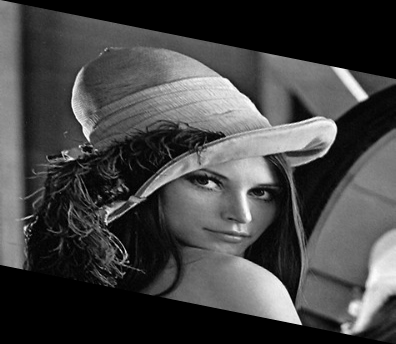

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = "/content/image.jpg"
image = cv2.imread(image_path)

# 1. Image Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, translation_matrix, (cols, rows))

translated_image = translate_image(image, 100, 50)

# 2. Image Reflection
def reflect_image(image, axis='x'):
    if axis == 'x':
        return cv2.flip(image, 0)
    elif axis == 'y':
        return cv2.flip(image, 1)

reflected_image = reflect_image(image, axis='x')

# 3. Image Rotation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(image, rotation_matrix, (cols, rows))

rotated_image = rotate_image(image, 45)

# 4. Image Scaling
def scale_image(image, scale_x, scale_y):
    return cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)

scaled_image = scale_image(image, 1.5, 1.5)

# 5. Image Cropping
cropped_image = image[50:200, 50:200]

# 6. Shearing
def shear_image(image, shx, shy):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shx, 0], [shy, 1, 0]])
    return cv2.warpAffine(image, shear_matrix, (cols + int(shx * rows), rows + int(shy * cols)))

sheared_x_image = shear_image(image, shx=0.2, shy=0)
sheared_y_image = shear_image(image, shx=0, shy=0.2)

print("Original Image")
cv2_imshow(image)

print("Translated Image (100 px right, 50 px down)")
cv2_imshow(translated_image)

print("Reflected Image (Across X-axis)")
cv2_imshow(reflected_image)

print("Rotated Image (45°)")
cv2_imshow(rotated_image)

print("Scaled Image (1.5x in both directions)")
cv2_imshow(scaled_image)

print("Cropped Image (From 50 to 200 px in both directions)")
cv2_imshow(cropped_image)

print("Sheared Image (Shear in X-axis, 0.2)")
cv2_imshow(sheared_x_image)

print("Sheared Image (Shear in Y-axis, 0.2)")
cv2_imshow(sheared_y_image)
